In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy.signal import find_peaks

In [31]:
import os


In [5]:
df = pd.read_excel("dados_flx25_controle_machos_femeas_all.xlsx")

In [6]:
def max_btwen(df):
#     print(df)
    altM = df['@altM']
    larM = df['@larM']
    if altM > larM:
        return altM
    else:
        return larM

def min_btwen(df):
#     print(df)
    altM = df['@altM']
    larM = df['@larM']
    if altM < larM:
        return altM
    else:
        return larM
    

In [7]:
df["max_l"] = df.apply(max_btwen, axis=1)
df["min_l"] = df.apply(min_btwen, axis=1)
df["@form"] = df["max_l"] /df["min_l"]

In [8]:
df.head()

,categoria,trecho,q_inicio,q_fim,id_j,@f,@Vd,@Van,@ceX,@ceY,@arM,@altM,@larM,sexo,dosagem,unidade,max_l,min_l,@form
0,Swimming,0,126,190,5f8f5517d3d64947e0da241b,126,2.837332,0.742996,205.100,123.923,27.7320,4.77899,11.20080,femea,veiculo,A6,11.20080,4.77899,2.343759
1,Swimming,0,126,190,5f8f5517d3d64947e0da241b,127,2.670318,0.699261,205.446,121.586,29.0769,4.86800,11.10900,femea,veiculo,A6,11.10900,4.86800,2.282046
2,Swimming,0,126,190,5f8f5517d3d64947e0da241b,128,174.304761,45.644200,208.645,117.210,26.7436,10.67820,3.89783,femea,veiculo,A6,10.67820,3.89783,2.739524
3,Swimming,0,126,190,5f8f5517d3d64947e0da241b,129,-69.536770,-18.209200,205.374,102.144,16.7786,8.36027,2.97792,femea,veiculo,A6,8.36027,2.97792,2.807419
4,Swimming,0,126,190,5f8f5517d3d64947e0da241b,130,70.774434,18.533300,202.148,95.839,20.8537,10.71940,3.01483,femea,veiculo,A6,10.71940,3.01483,3.555557


In [9]:
df["dosagem"].unique()

array(['veiculo', 'flx2.5mg'], dtype=object)

In [10]:
df_femea_ve = df[(df["sexo"] == "femea") &(df['dosagem'] == "veiculo" )]
df_femea_flx = df[(df["sexo"] == "femea") &(df['dosagem'] == "flx2.5mg" )]
df_macho_ve = df[(df["sexo"] == "macho") &(df['dosagem'] == "veiculo" )]
df_macho_flx = df[(df["sexo"] == "macho") &(df['dosagem'] == "flx2.5mg" )]
df_femea_ve

,categoria,trecho,q_inicio,q_fim,id_j,@f,@Vd,@Van,@ceX,@ceY,@arM,@altM,@larM,sexo,dosagem,unidade,max_l,min_l,@form
0,Swimming,0,126,190,5f8f5517d3d64947e0da241b,126,2.837332,0.742996,205.100,123.923,27.7320,4.77899,11.20080,femea,veiculo,A6,11.20080,4.77899,2.343759
1,Swimming,0,126,190,5f8f5517d3d64947e0da241b,127,2.670318,0.699261,205.446,121.586,29.0769,4.86800,11.10900,femea,veiculo,A6,11.10900,4.86800,2.282046
2,Swimming,0,126,190,5f8f5517d3d64947e0da241b,128,174.304761,45.644200,208.645,117.210,26.7436,10.67820,3.89783,femea,veiculo,A6,10.67820,3.89783,2.739524
3,Swimming,0,126,190,5f8f5517d3d64947e0da241b,129,-69.536770,-18.209200,205.374,102.144,16.7786,8.36027,2.97792,femea,veiculo,A6,8.36027,2.97792,2.807419
4,Swimming,0,126,190,5f8f5517d3d64947e0da241b,130,70.774434,18.533300,202.148,95.839,20.8537,10.71940,3.01483,femea,veiculo,A6,10.71940,3.01483,3.555557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187188,Immobility,173,7438,7536,5f8f5517d3d64947e0da2423,7531,0.000000,0.000000,214.578,151.335,16.7057,3.43689,6.74650,femea,veiculo,A7,6.74650,3.43689,1.962967
187189,Immobility,173,7438,7536,5f8f5517d3d64947e0da2423,7532,3.818771,1.000000,213.801,152.189,17.6292,3.56419,7.12837,femea,veiculo,A7,7.12837,3.56419,1.999997
187190,Immobility,173,7438,7536,5f8f5517d3d64947e0da2423,7533,0.000000,0.000000,213.798,152.177,17.6454,3.56419,7.12837,femea,veiculo,A7,7.12837,3.56419,1.999997
187191,Immobility,173,7438,7536,5f8f5517d3d64947e0da2423,7534,0.000000,0.000000,213.798,152.177,17.6454,3.56419,7.12837,femea,veiculo,A7,7.12837,3.56419,1.999997


In [11]:
df_femea_flx

,categoria,trecho,q_inicio,q_fim,id_j,@f,@Vd,@Van,@ceX,@ceY,@arM,@altM,@larM,sexo,dosagem,unidade,max_l,min_l,@form
37693,Climbing,0,167,845,5f8f5510d3d64947e0da23b3,167,-124.391898,-32.824700,191.563,153.570,26.46400,6.56861,10.10560,femea,flx2.5mg,A7,10.10560,6.56861,1.538469
37694,Climbing,0,167,845,5f8f5510d3d64947e0da23b3,168,101.904897,26.890800,196.028,152.293,21.15050,9.96544,3.43247,femea,flx2.5mg,A7,9.96544,3.43247,2.903285
37695,Climbing,0,167,845,5f8f5510d3d64947e0da23b3,169,9.361291,2.470270,198.044,152.238,22.23550,10.27750,3.43247,femea,flx2.5mg,A7,10.27750,3.43247,2.994200
37696,Climbing,0,167,845,5f8f5510d3d64947e0da23b3,170,0.398353,0.105118,199.061,152.240,22.33920,10.29080,3.43247,femea,flx2.5mg,A7,10.29080,3.43247,2.998074
37697,Climbing,0,167,845,5f8f5510d3d64947e0da23b3,171,-206.404141,-54.466200,201.787,148.991,20.28880,3.41062,10.23190,femea,flx2.5mg,A7,10.23190,3.41062,3.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216698,Immobility,224,7449,7561,5f8f550fd3d64947e0da239b,7556,0.000000,0.000000,129.598,109.381,6.95231,1.54152,7.35186,femea,flx2.5mg,A4,7.35186,1.54152,4.769228
216699,Immobility,224,7449,7561,5f8f550fd3d64947e0da239b,7557,8.767060,2.338020,128.796,111.139,6.39769,1.83376,7.09767,femea,flx2.5mg,A4,7.09767,1.83376,3.870556
216700,Immobility,224,7449,7561,5f8f550fd3d64947e0da239b,7558,0.000000,0.000000,129.032,111.011,6.42893,1.83376,7.09767,femea,flx2.5mg,A4,7.09767,1.83376,3.870556
216701,Immobility,224,7449,7561,5f8f550fd3d64947e0da239b,7559,-1.014552,-0.270563,129.583,111.540,6.17115,1.79994,5.57567,femea,flx2.5mg,A4,5.57567,1.79994,3.097698


In [12]:
df_femea_ve["categoria"].unique() 

array(['Swimming', 'Immobility', 'Climbing', 'Diving', 'Undefined',
       'Headshaking'], dtype=object)

In [13]:
# rool = 30
def get_plot_form(df, rool=30, tp= "median"):
    df_femea_ve_vd = df["@form"].reset_index()
    x = [0]
    if tp == "median":
        x = df_femea_ve_vd[df_femea_ve_vd["@form"] != 0].rolling(rool).median().dropna()["@form"] # df_femea_ve_vd["@Vd"].rolling(100).sum().dropna()

    if tp == "mean":
        x = df_femea_ve_vd[df_femea_ve_vd["@form"] != 0].rolling(rool).mean().dropna()["@form"] # df_femea_ve_vd["@Vd"].rolling(100).sum().dropna()

    if tp == "sum":
        x = df_femea_ve_vd[df_femea_ve_vd["@form"] != 0].rolling(rool).sum().dropna()["@form"] # df_femea_ve_vd["@Vd"].rolling(100).sum().dropna()

        
#     x = x.reset_index()["@form"]
#     peaks, _ = find_peaks(abs(x)) #, height=50)
#     plt.plot(peaks, x[peaks], "x")
#     plt.show()
#     plt.hist(x[peaks],bins=60)
#     plt.show()
    plt.hist(x,bins=60)
    plt.show()
    return x
    
def get_plot_arm(df):
    df_femea_ve_vd = df["@arM"].reset_index()
    x = df_femea_ve_vd[df_femea_ve_vd["@arM"] != 0].rolling(rool).median().dropna()["@arM"] # df_femea_ve_vd["@Vd"].rolling(100).sum().dropna()
    x = x.reset_index()["@arM"]
#     peaks, _ = find_peaks(abs(x)) #, height=50)
#     plt.plot(peaks, x[peaks], "x")
#     plt.show()
#     plt.hist(x[peaks],bins=60)
    plt.show()
    plt.hist(x,bins=30)
    plt.show()



def get_plot(df):
    df_femea_ve_vd = df["@Vd"].reset_index()
    x = df_femea_ve_vd[df_femea_ve_vd["@Vd"] != 0].rolling(rool).median().dropna()["@Vd"] # df_femea_ve_vd["@Vd"].rolling(100).sum().dropna()
    x = x.reset_index()["@Vd"]
    peaks, _ = find_peaks(abs(x)) #, height=50)
    plt.plot(peaks, x[peaks], "x")
    plt.show()
    plt.hist(x[peaks],bins=60)
    plt.show()
    plt.hist(x,bins=60)
    plt.show()

In [34]:
# df_c = pd.DataFrame
def save_csv_(path, df_sexo_tratamento):
    # get_plot_form(df)
    ls_df = []
    ls_rol = [1, 30, 60, 90]
    for rol in ls_rol:
        df_c = pd.DataFrame()
        for op in ["median", "mean", "sum"]:

            x_1 = get_plot_form(df_sexo_tratamento, rol,  op)
            df_c[f'{op}'] = x_1

        ls_df.append(df_c)
    # x_30 = get_plot_form(df, 30, "mean")
    # x_60 = get_plot_form(df, 60, "mean")
    # x_90 = get_plot_form(df, 90, "mean")

    ls_zip = list(zip(ls_rol, ls_df))
    ls_zip
    if not os.path.exists("D:/doutorado_mais_novo/analise_dados/teste_folder/"+path):
        os.makedirs("D:/doutorado_mais_novo/analise_dados/teste_folder/"+path)

    for i, df in ls_zip:
        df.to_csv(f'{path}/{i}_all.csv')

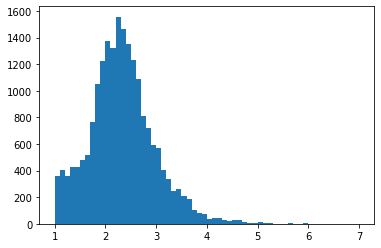

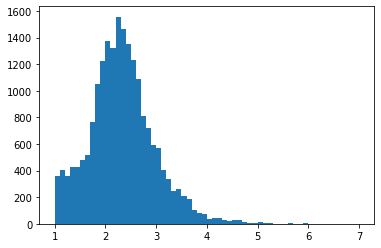

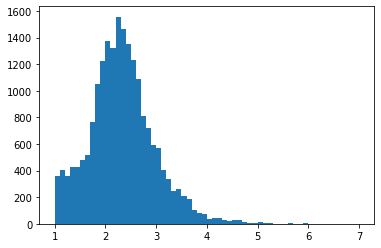

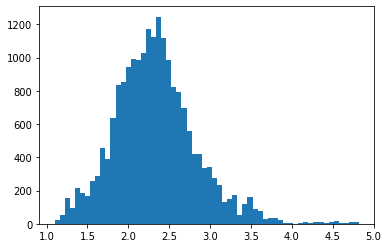

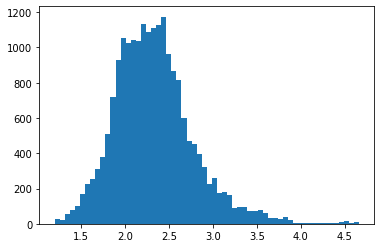

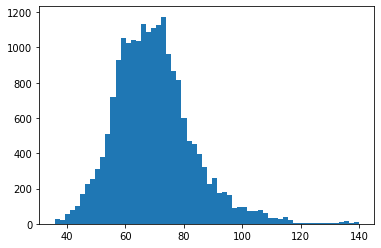

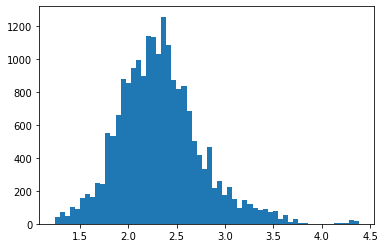

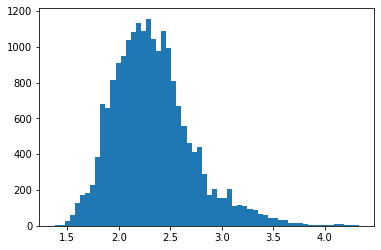

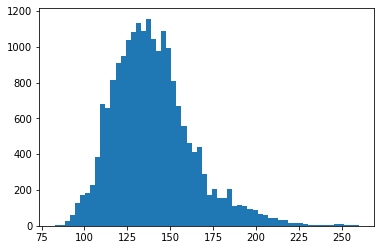

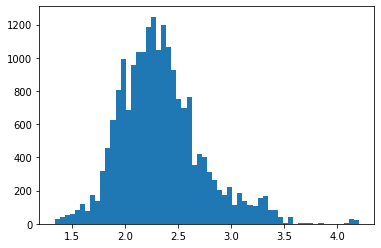

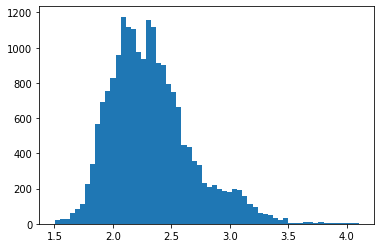

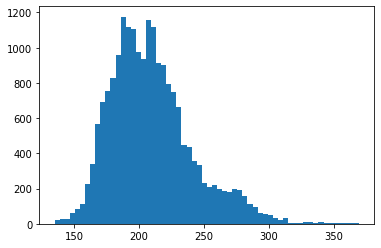

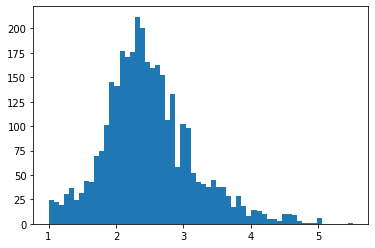

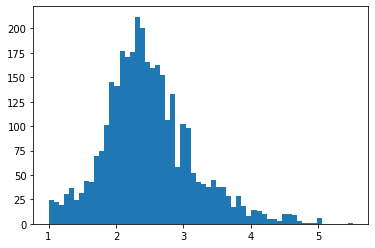

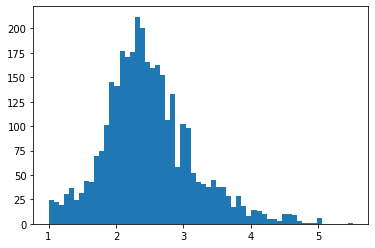

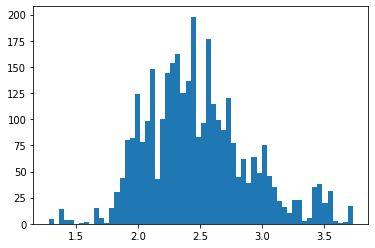

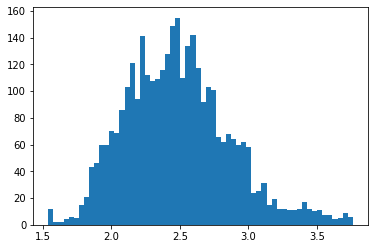

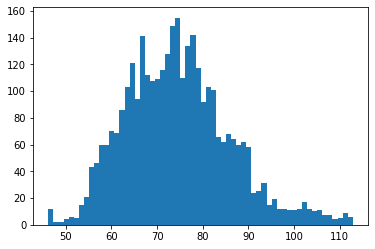

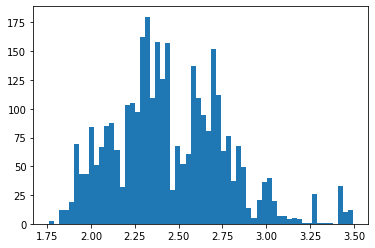

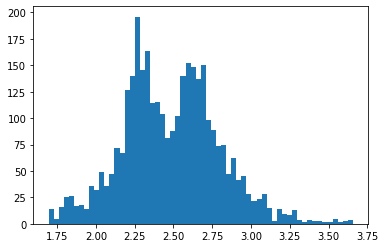

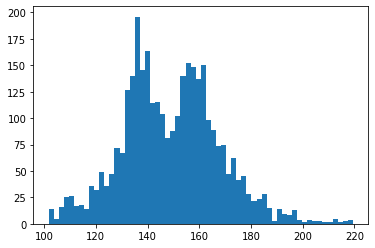

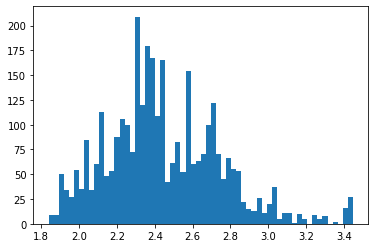

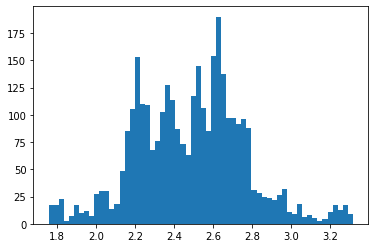

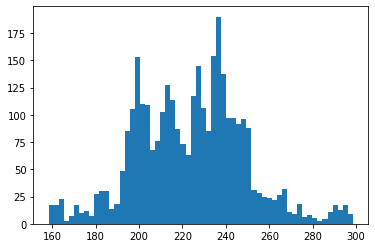

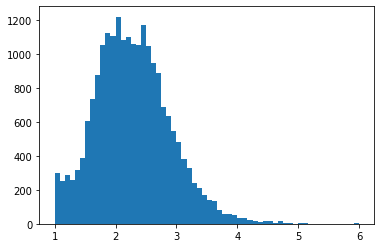

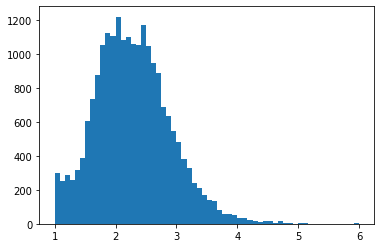

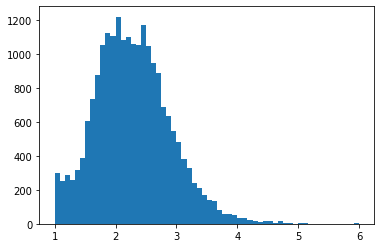

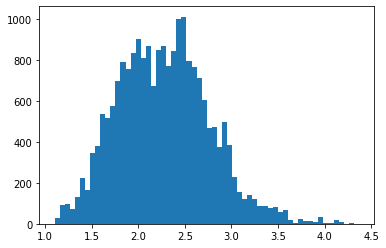

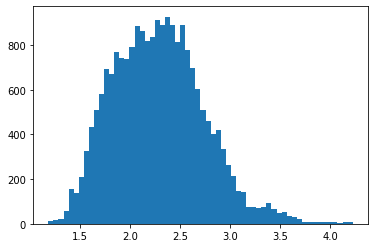

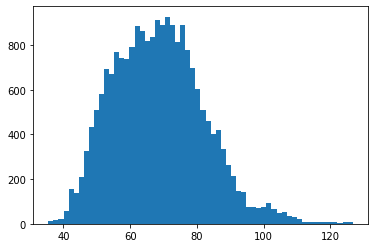

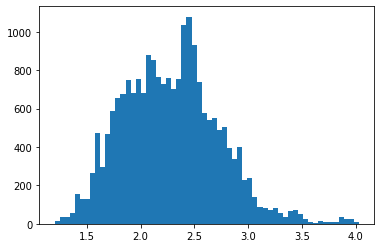

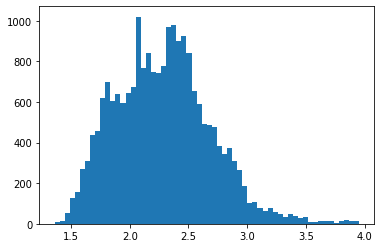

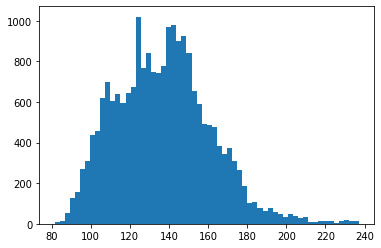

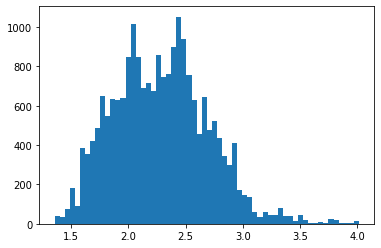

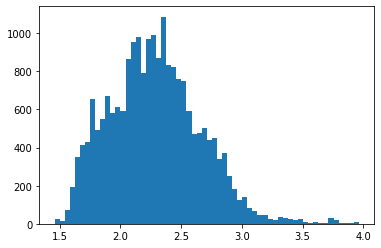

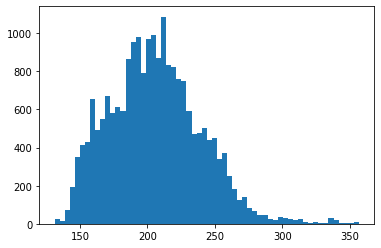

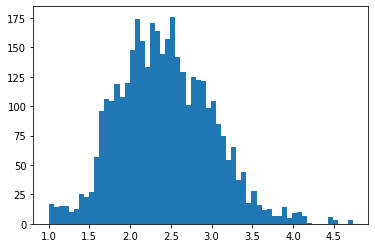

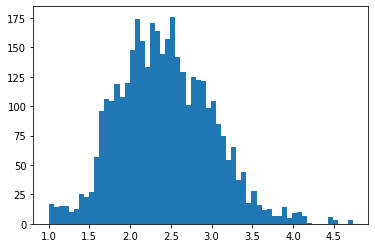

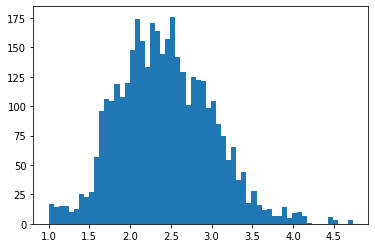

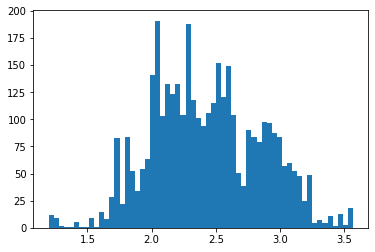

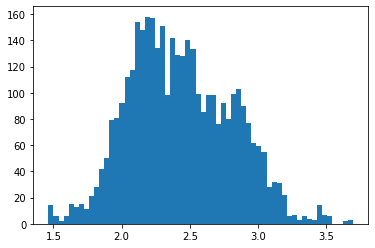

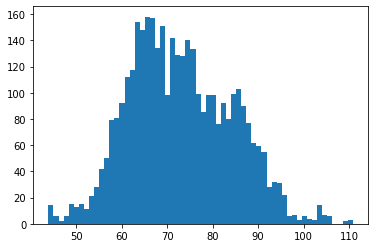

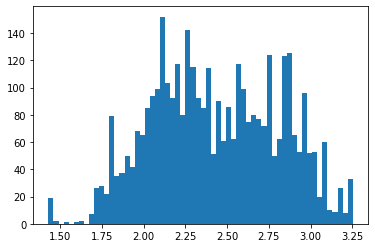

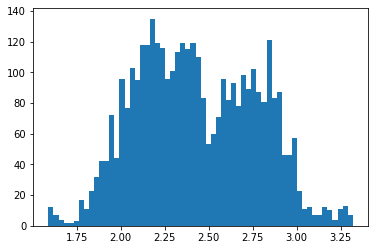

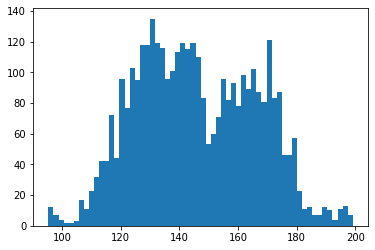

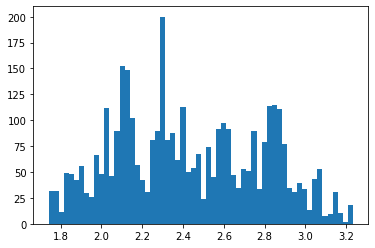

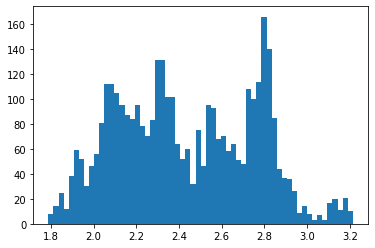

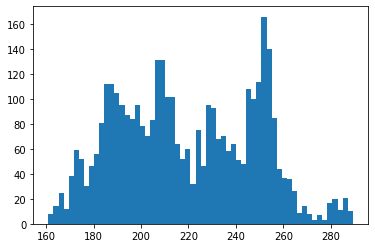

In [37]:
save_csv_("df_femea_ve_immo/",df_femea_ve[df_femea_ve["categoria"] == "Immobility"])
save_csv_("df_femea_ve_swim/",df_femea_ve[df_femea_ve["categoria"] == "Swimming"])

save_csv_("df_femea_flx_immo/",df_femea_flx[df_femea_flx["categoria"] == "Immobility"])
save_csv_("df_femea_flx_swim/",df_femea_flx[df_femea_flx["categoria"] == "Swimming"])


# save_csv_("df_femea_ve",df_femea_ve)
# save_csv_("data_fem_flx",df_femea_flx)
# save_csv_("data_fem_flx",df_femea_flx)

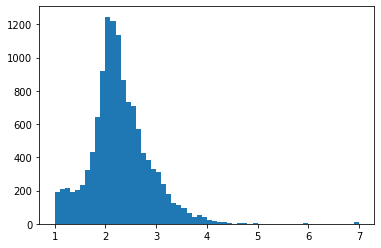

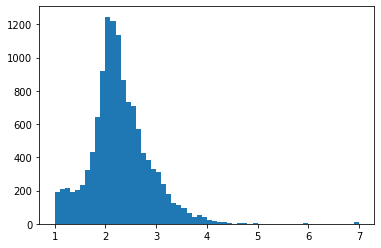

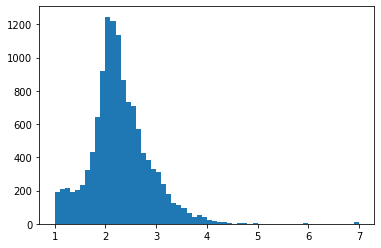

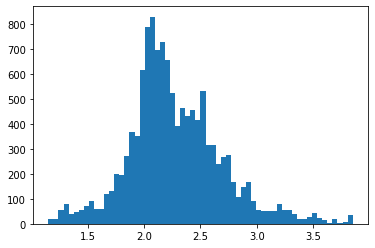

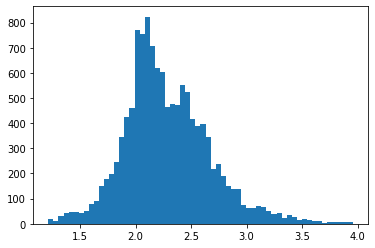

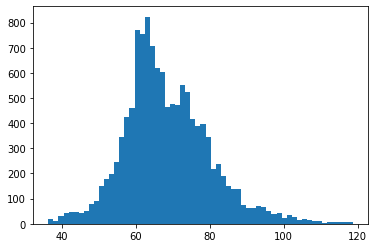

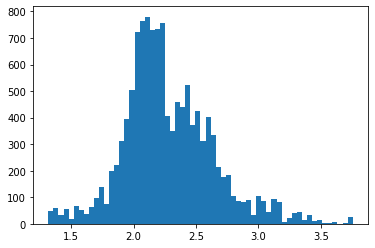

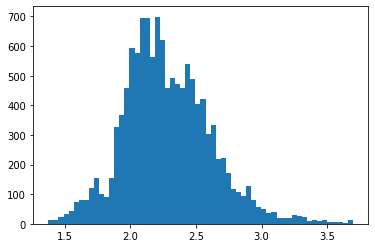

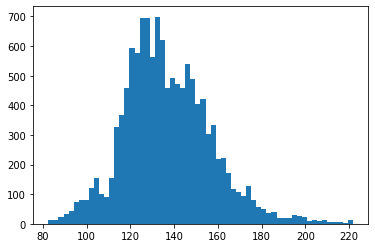

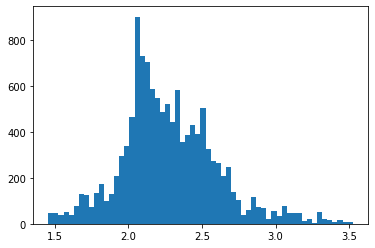

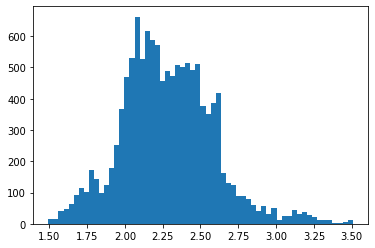

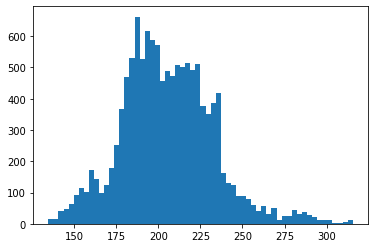

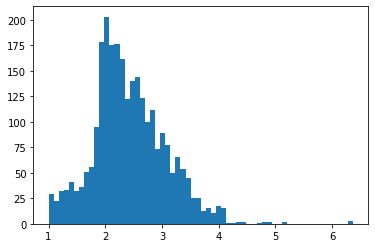

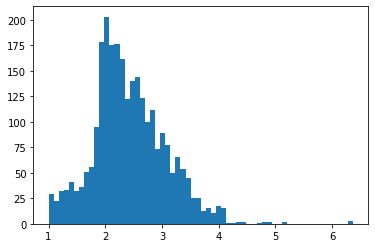

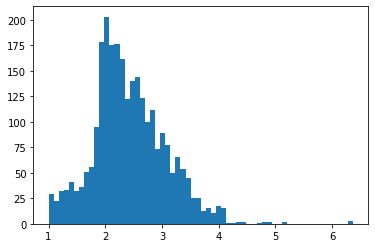

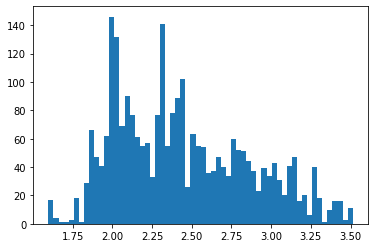

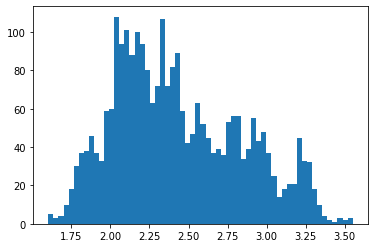

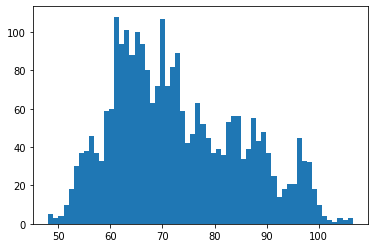

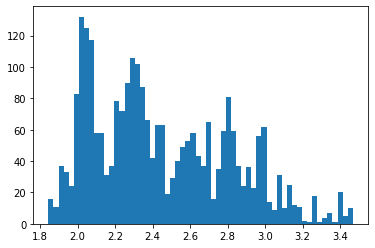

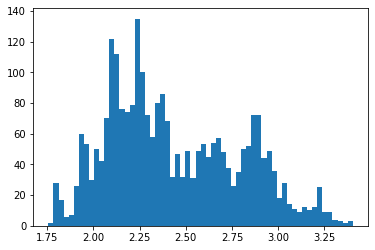

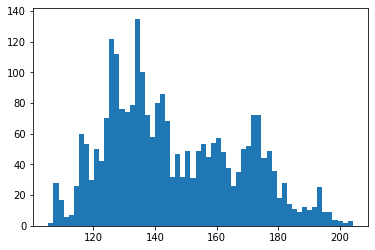

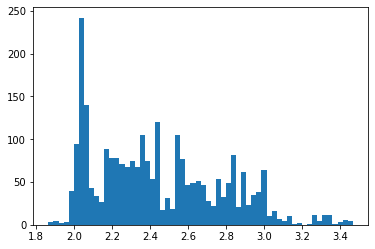

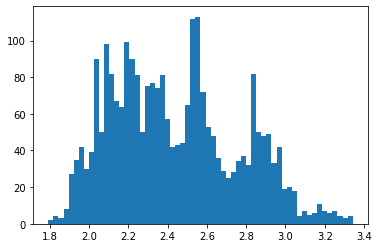

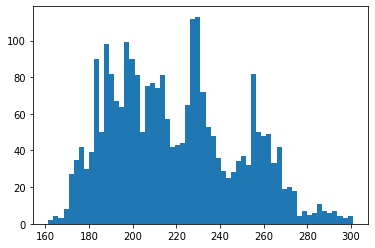

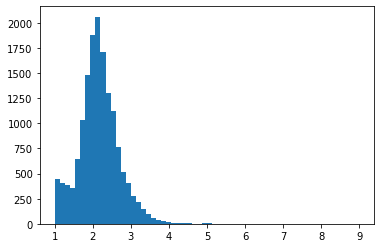

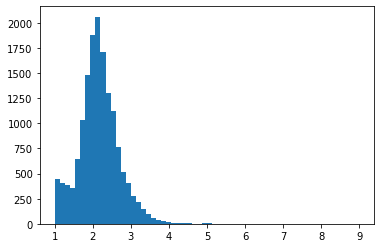

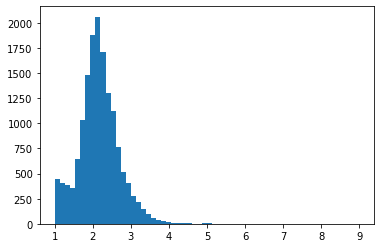

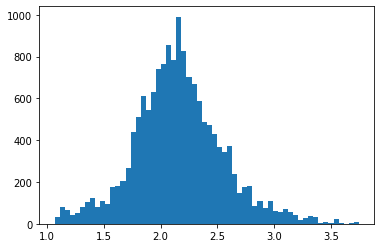

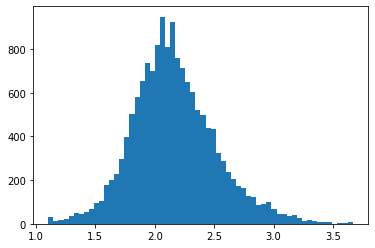

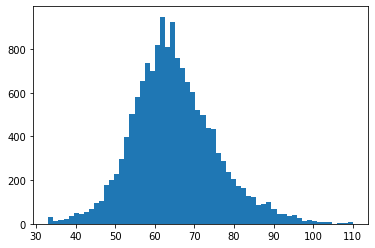

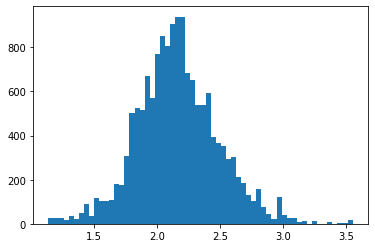

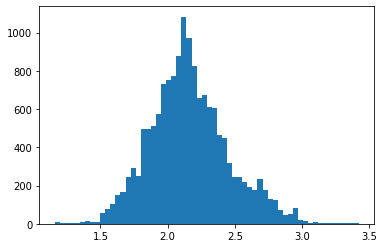

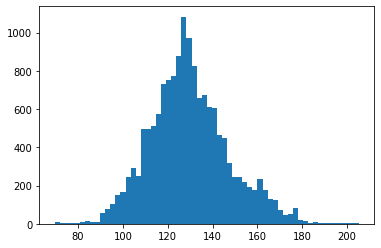

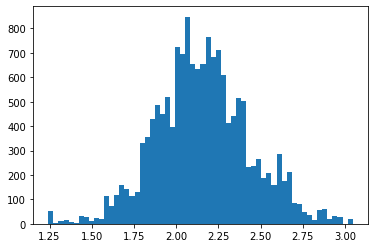

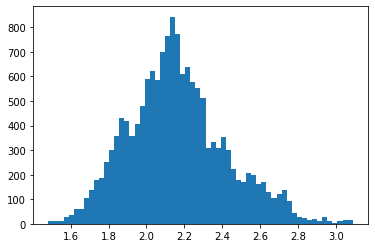

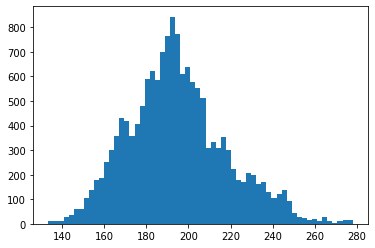

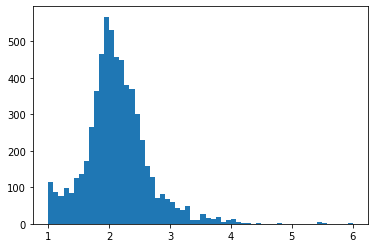

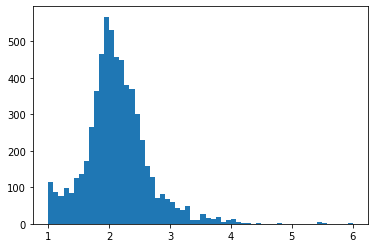

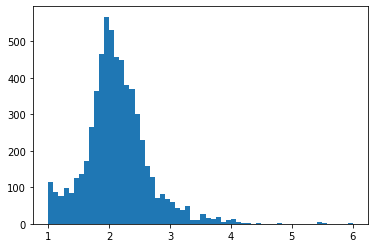

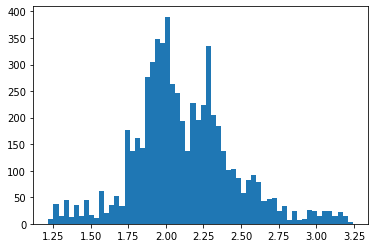

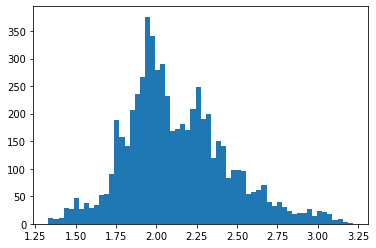

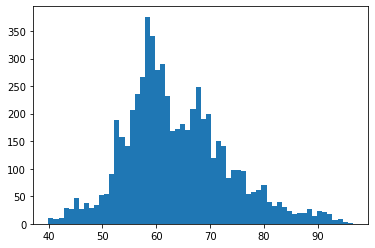

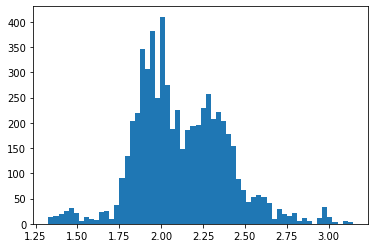

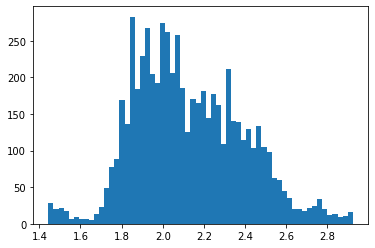

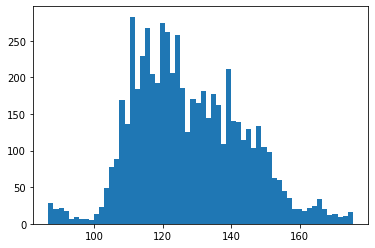

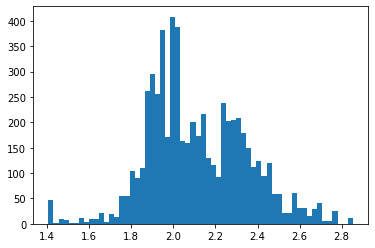

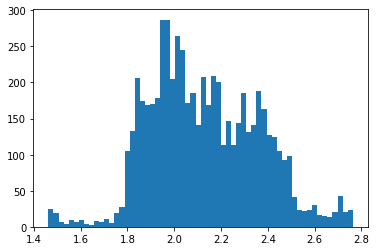

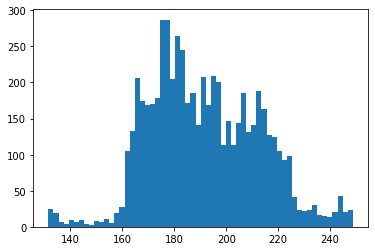

In [38]:
save_csv_("df_macho_flx_immo/",df_macho_flx[df_macho_flx["categoria"] == "Immobility"])
save_csv_("df_macho_flx_swim/",df_macho_flx[df_macho_flx["categoria"] == "Swimming"])

save_csv_("df_macho_ve_immo/",df_macho_ve[df_macho_ve["categoria"] == "Immobility"])
save_csv_("df_macho_ve_swim/",df_macho_ve[df_macho_ve["categoria"] == "Swimming"])

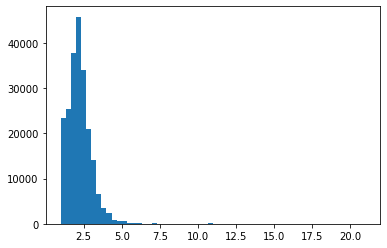

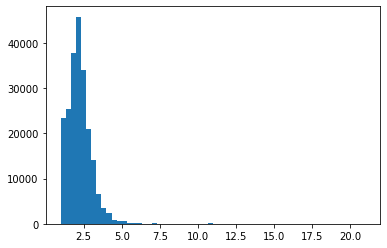

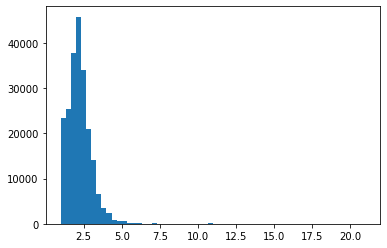

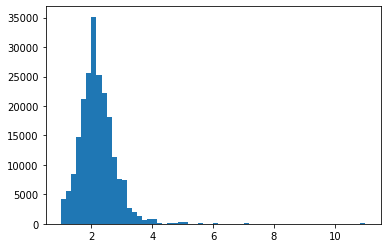

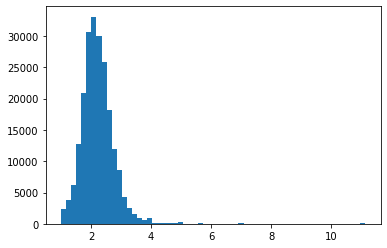

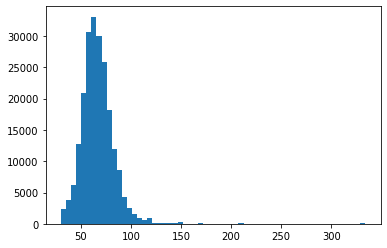

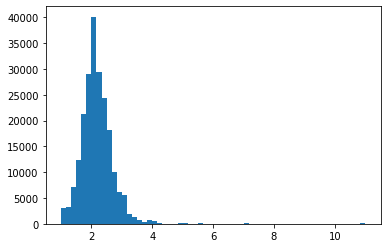

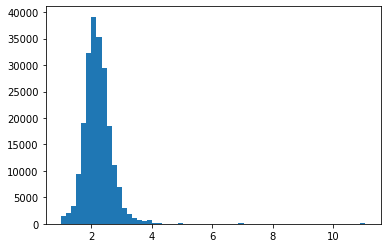

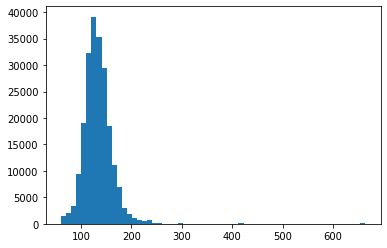

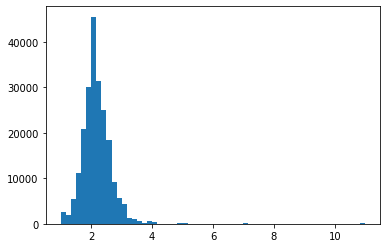

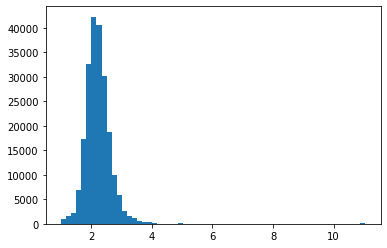

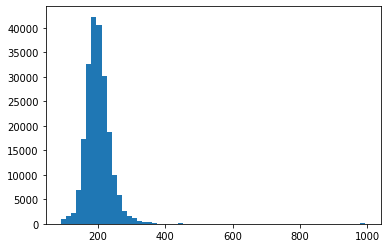

In [15]:
# get_plot_form(df)
ls_df = []
ls_rol = [1, 30, 60, 90]
for rol in ls_rol:
    df_c = pd.DataFrame()
    for op in ["median", "mean", "sum"]:
    
        x_1 = get_plot_form(df, rol,  op)
        df_c[f'{op}'] = x_1
        
    ls_df.append(df_c)
# x_30 = get_plot_form(df, 30, "mean")
# x_60 = get_plot_form(df, 60, "mean")
# x_90 = get_plot_form(df, 90, "mean")

ls_zip = list(zip(ls_rol, ls_df))
ls_zip
for i, df in ls_zip:
    df.to_csv(f'data_fem_flx/{i}_all.csv')

[(1,
            median      mean       sum
  0       2.343759  2.343759  2.343759
  1       2.282046  2.282046  2.282046
  2       2.739524  2.739524  2.739524
  3       2.807419  2.807419  2.807419
  4       3.555557  3.555557  3.555557
  ...          ...       ...       ...
  216698  4.769228  4.769228  4.769228
  216699  3.870556  3.870556  3.870556
  216700  3.870556  3.870556  3.870556
  216701  3.097698  3.097698  3.097698
  216702  4.223677  4.223677  4.223677
  
  [216703 rows x 3 columns]),
 (30,
            median      mean        sum
  29      2.944884  3.007589  90.227675
  30      3.082349  3.053957  91.618699
  31      3.131879  3.105608  93.168235
  32      3.163876  3.119168  93.575052
  33      3.163876  3.122213  93.666386
  ...          ...       ...        ...
  216698  2.444441  2.384863  71.545903
  216699  2.459891  2.474199  74.225982
  216700  2.475341  2.566551  76.996538
  216701  2.530779  2.633141  78.994236
  216702  2.586217  2.736431  82.092916
  
  [21

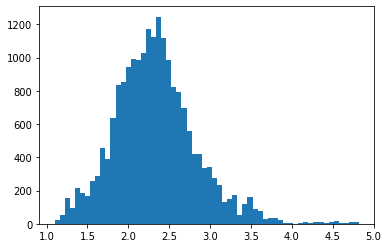

29       2.676486
30       2.706513
31       2.737881
32       2.747357
33       2.772958
           ...   
20295    1.962967
20296    1.962967
20297    1.962967
20298    1.962967
20299    1.962967
Name: @form, Length: 20271, dtype: float64

In [18]:
get_plot_form(df_femea_ve[df_femea_ve["categoria"] == "Immobility"])

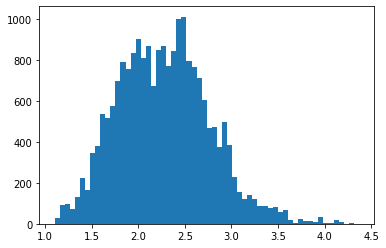

29       1.817903
30       1.817903
31       1.817903
32       1.817903
33       1.838171
           ...   
21297    2.444441
21298    2.459891
21299    2.475341
21300    2.530779
21301    2.586217
Name: @form, Length: 21273, dtype: float64

In [19]:
get_plot_form(df_femea_flx[df_femea_flx["categoria"] == "Immobility"])

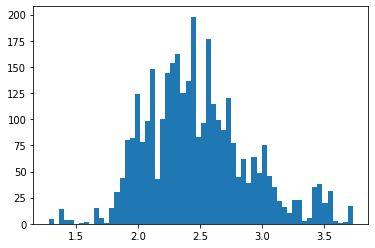

29      2.944884
30      3.082349
31      3.131879
32      3.163876
33      3.163876
          ...   
3360    2.008956
3361    2.002092
3362    1.969796
3363    1.937499
3364    1.937499
Name: @form, Length: 3336, dtype: float64

In [20]:
get_plot_form(df_femea_ve[df_femea_ve["categoria"] == "Swimming"])

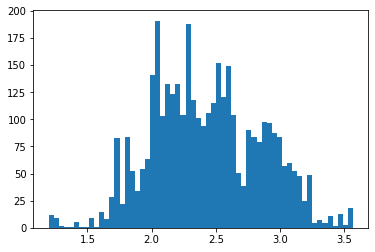

29      2.117885
30      2.117885
31      2.117885
32      2.117885
33      2.117885
          ...   
3747    2.301136
3748    2.301136
3749    2.301136
3750    2.211851
3751    2.152827
Name: @form, Length: 3723, dtype: float64

In [21]:
get_plot_form(df_femea_flx[df_femea_flx["categoria"] == "Swimming"])

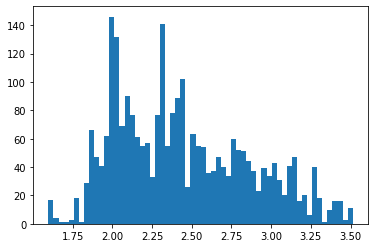

29      2.484066
30      2.358897
31      2.358897
32      2.358897
33      2.358897
          ...   
2647    1.896868
2648    1.890513
2649    1.872530
2650    1.837273
2651    1.813226
Name: @form, Length: 2623, dtype: float64

In [22]:
get_plot_form(df_macho_flx[df_macho_flx["categoria"] == "Swimming"])

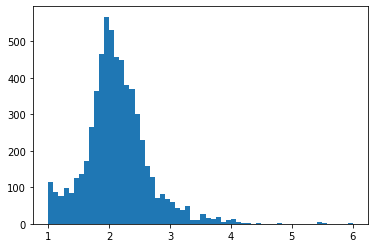

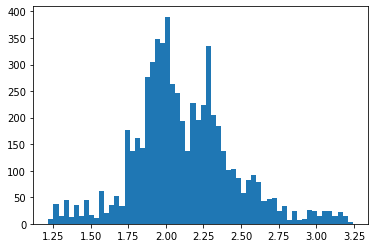

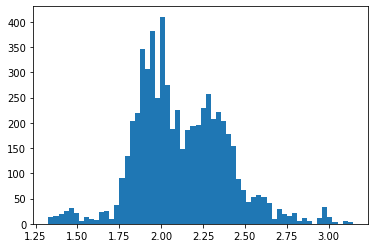

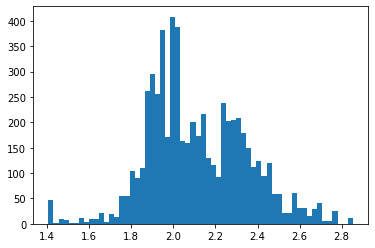

In [23]:
x_1 = get_plot_form(df_macho_ve[df_macho_ve["categoria"] == "Swimming"], 1)
x_30 = get_plot_form(df_macho_ve[df_macho_ve["categoria"] == "Swimming"], 30)
x_60 = get_plot_form(df_macho_ve[df_macho_ve["categoria"] == "Swimming"], 60)
x_90 = get_plot_form(df_macho_ve[df_macho_ve["categoria"] == "Swimming"], 90)


In [24]:
x.to_csv("macho_swimming_veiculo.csv")

NameError: name 'x' is not defined

In [ ]:
get_plot_form(df_macho_ve[df_macho_ve["categoria"] == "Immobility"])

In [ ]:
get_plot_form(df_macho_flx[df_macho_flx["categoria"] == "Immobility"])

In [ ]:
# df_femea_ve_vd = df_femea_ve["@Vd"].reset_index()
# df_femea_ve_vd

In [ ]:
# x = df_femea_ve_vd["@Vd"].rolling(100)
# # plt.plot(x)
# plt.plot(df_femea_ve_vd[df_femea_ve_vd["@Vd"] != 0].rolling(100).median().dropna()["@Vd"])

In [ ]:
# x = df_femea_ve_vd[df_femea_ve_vd["@Vd"] != 0].rolling(100).median().dropna()["@Vd"] # df_femea_ve_vd["@Vd"].rolling(100).sum().dropna()
# # ind = [i for i in range(len(x))]
# x = x.reset_index()["@Vd"]

In [ ]:
# # x = df_femea_ve["@Vd"][0:1000].rolling(30).sum()
# # x = df_femea_ve_vd[0:1000].rolling(30).sum().dropna()
# plt.plot(x)

# peaks, _ = find_peaks(abs(x)) #, height=50)
# plt.plot(peaks, x[peaks], "x")

In [ ]:
# plt.hist(x[peaks],bins=60)

In [ ]:
# x_n = abs(df_femea_ve["@Vd"][0:1000])
# x = df_femea_ve["@Vd"][0:1000]

In [ ]:
# peaks, _ = find_peaks(x_n)
# peaks

In [ ]:
# plt.figure(figsize=(8, 6), dpi=80)
# plt.plot(x)
# plt.plot(peaks, x[peaks], "x")

In [ ]:
# plt.hist(x[peaks])